In [128]:
import numpy as np
import matplotlib.pyplot as pl

#This is code for simple GP regression. It assumes a zero mean GP Prior
#from www.cs.ubc.ca/~nando/540-2013/lectures/gp.py

In [129]:
#settings
N = 30         # number of training points.
n = 30         # number of test points.
s = 0.00005    # noise variance.

interval = 30   #range of function input (-,+)
offset = 5      #future prediction

n_sd = 1       # number of sd to plot

In [130]:
X_t = np.linspace(-interval, interval+offset, interval *20)
Y_t = f(X_t)

In [131]:
# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()
#f = lambda x: (0.25*(x**2)).flatten()

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-interval, interval, size=(N,1))
y = f(X) + s*np.random.randn(N)

In [132]:
# Define the kernel
def kernel(a, b):
    """ GP squared exponential RBF kernel """
    kernelParameter = 1   #tune this via crossval
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

In [133]:
K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))

In [134]:
# points we're going to make predictions at.
Xtest = np.linspace(-interval+offset, interval+offset, n).reshape(-1,1)

In [135]:
# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
#LAPACK LU decomposition with partial pivoting and row interchanges is used to solve the system
mu = np.dot(Lk.T, np.linalg.solve(L, y))

In [136]:
# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

In [137]:
# PLOTS:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=20)
pl.plot(X_t, Y_t, 'g-')
pl.plot((interval, interval), (-3, 3), 'k-')
#pl.plot(Xtest, f(Xtest), 'b-')
pl.gca().fill_between(Xtest.flat, mu-n_sd*s, mu+n_sd*s, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.savefig('predictive.png', bbox_inches='tight')
pl.title('Mean predictions plus %d st.deviations' % n_sd)
pl.axis([-interval, interval+offset, -3, 3])

[-30, 35, -3, 3]

In [138]:
# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))

In [139]:
pl.figure(2)
pl.clf()
pl.plot(Xtest, f_prior)
pl.title('Ten samples from the GP prior')
pl.axis([-interval, interval+offset, -3, 3])
pl.savefig('prior.png', bbox_inches='tight')

In [140]:
# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))

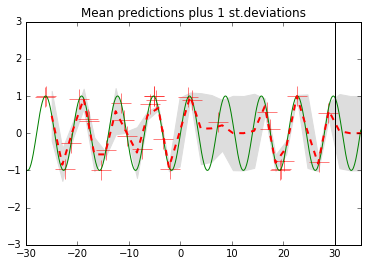

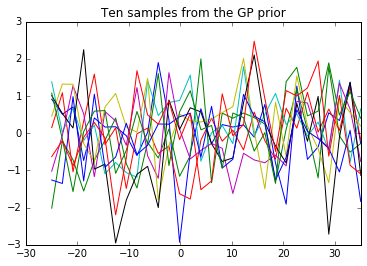

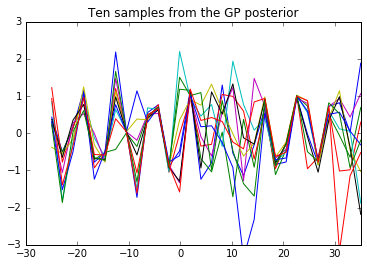

In [141]:
pl.figure(3)
pl.clf()
pl.plot(Xtest, f_post)
pl.title('Ten samples from the GP posterior')
pl.axis([-interval, interval+offset, -3, 3])
pl.savefig('post.png', bbox_inches='tight')

pl.show()